In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df=pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
#assigning new column name
df.columns=['Recency','Frequency','monetary','time','target']
df.head()

,Recency,Frequency,monetary,time,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
X=df.drop('target',axis=1)
y=df['target']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [6]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=5,random_state=42)
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred=clf.predict(X_test)

In [8]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy:.2f}")

accuracy:0.78


In [9]:
print(confusion_matrix(y_test,y_pred))

[[108   5]
 [ 28   9]]


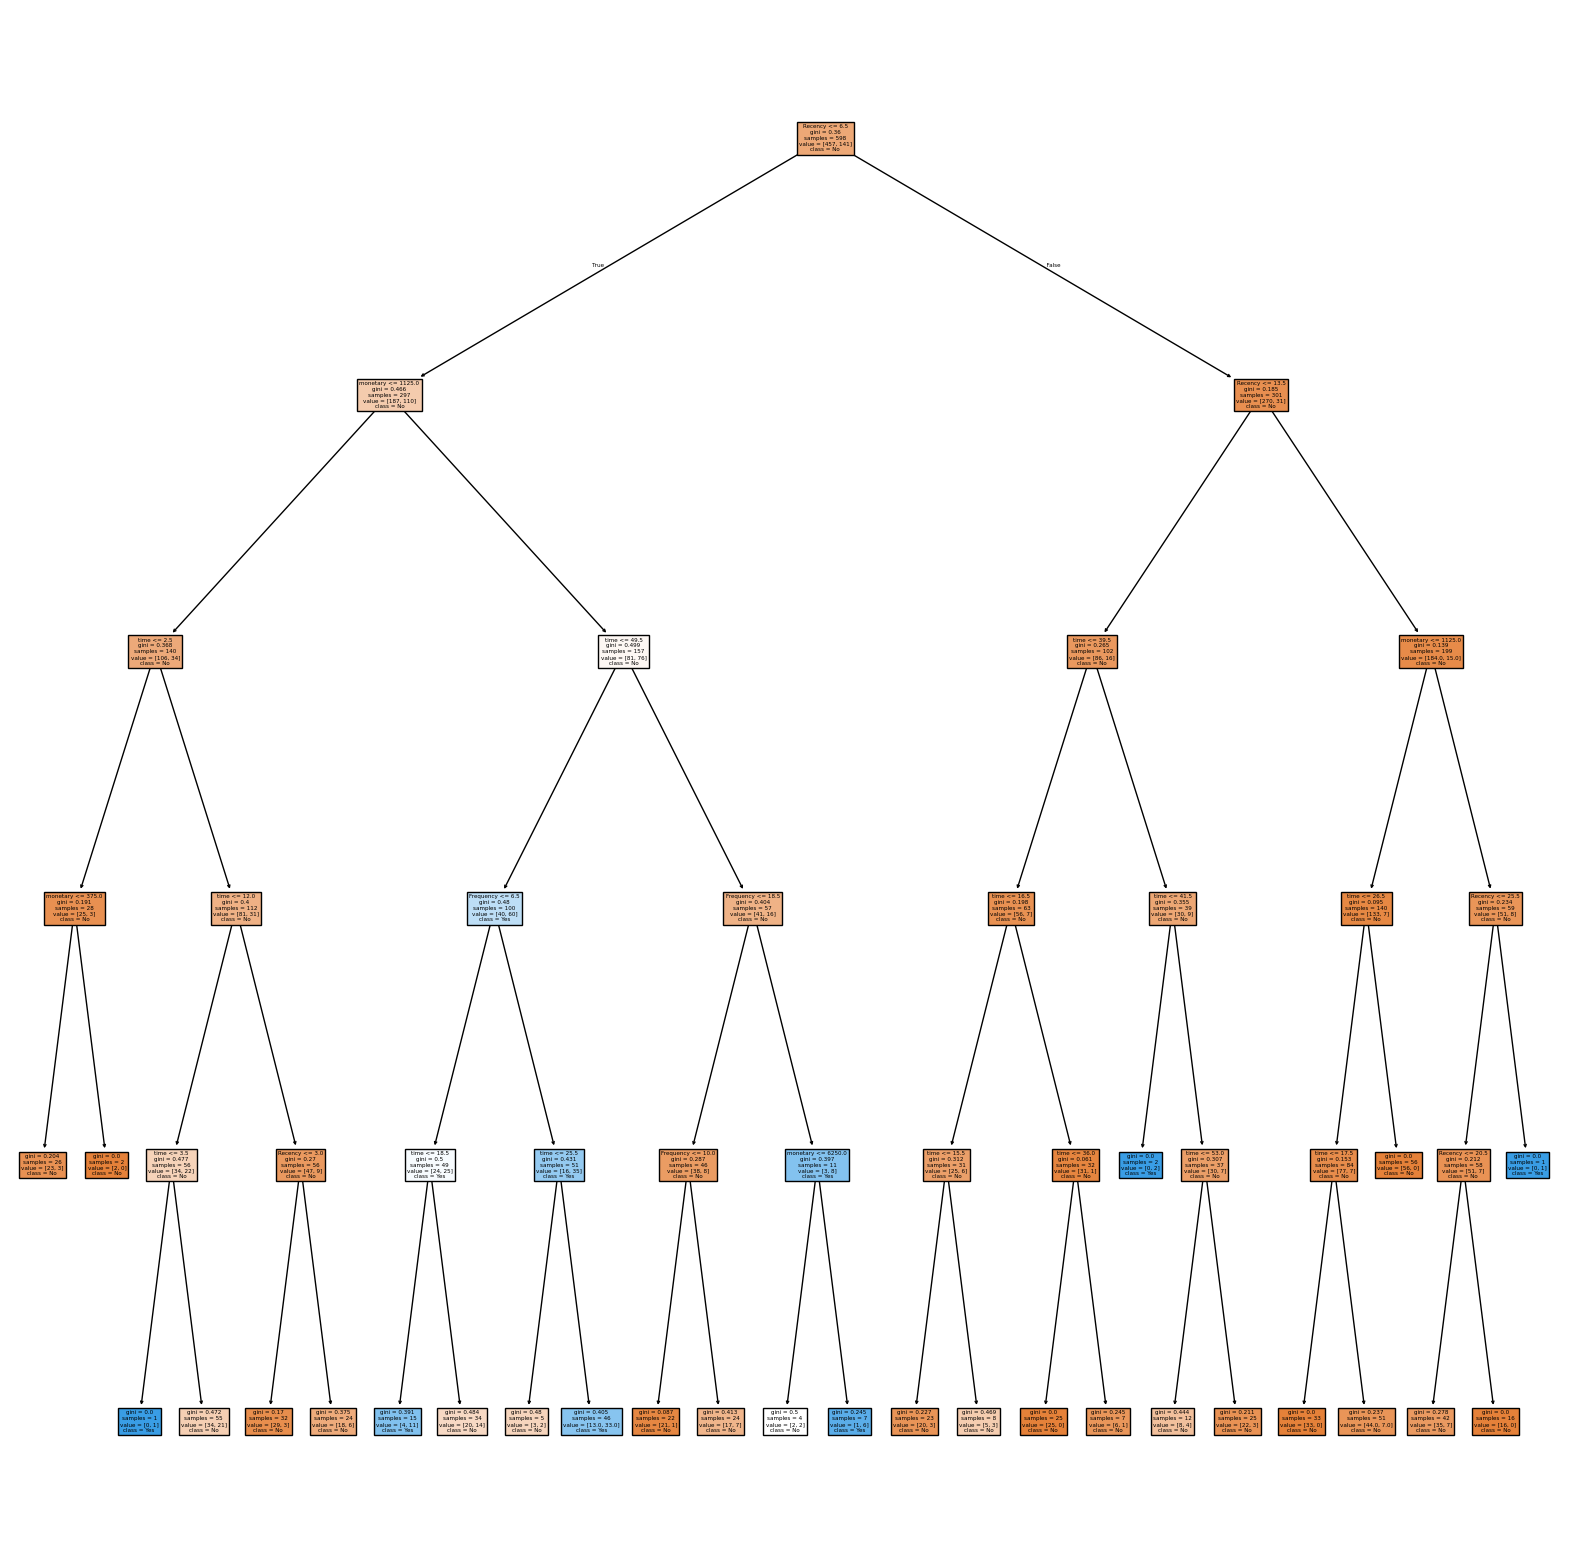

In [12]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True,feature_names=X.columns,class_names=['No','Yes'])
plt.show()

# hyperparameter tuning

In [ ]:
params=[
    {'criterion':"gini","max_depth":5,"min_samples_split":5},
    {"criterion":"entropy","max_depth":10,"min_samples_split":10},
    {'criterion':"gini","max_depth":10,"min_samples_split":10},
    {'criterion':"entropy","max_depth":5,"min_samples_split":5}
]

In [ ]:
for param in params:
    clf=DecisionTreeClassifier(criterion=param['criterion'],
                               max_depth=param['max_depth'],
                               min_samples_split=param['min_samples_split'],
                               random_state=42)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    print(f'params:{param},accuracy:{accuracy:.2f}')

params:{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5},accuracy:0.78
params:{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10},accuracy:0.72
params:{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10},accuracy:0.69
params:{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5},accuracy:0.79
